In [1]:
import pandas as pd

In [2]:
import h5py 
import numpy as np
def import_tfmodisco_motifs(tfm_results_path, trim=True, only_pos=True):
    """
    Imports the PFMs to into a dictionary, mapping `(x, y)` to the PFM,
    where `x` is the metacluster index and `y` is the pattern index.
    Arguments:
        `tfm_results_path`: path to HDF5 containing TF-MoDISco results
        `out_dir`: where to save motifs
        `trim`: if True, trim the motif flanks based on information content
        `only_pos`: if True, only return motifs with positive contributions
    Returns the dictionary of PFMs.
    """ 
    pfms = {}
    with h5py.File(tfm_results_path, "r") as f:
        metaclusters = f["metacluster_idx_to_submetacluster_results"]
        num_metaclusters = len(metaclusters.keys())
        for metacluster_i, metacluster_key in enumerate(metaclusters.keys()):
            metacluster = metaclusters[metacluster_key]
            print(len(metacluster["seqlets"].value))
            if "patterns" not in metacluster["seqlets_to_patterns_result"]:
                continue
            patterns = metacluster["seqlets_to_patterns_result"]["patterns"]
            num_patterns = len(patterns["all_pattern_names"][:])
            for pattern_i, pattern_name in enumerate(patterns["all_pattern_names"][:]):
                pattern_name = pattern_name
                pattern = patterns[pattern_name]
                if metacluster_i==0:
                    key = "pos_patterns.pattern_"+str(pattern_i)
                if metacluster_i==1:
                    key = "neg_patterns.pattern_"+str(pattern_i)                
                
                if key not in pfms:
                    pfms[key] = []

                for seqlet in pattern["seqlets_and_alnmts"]["seqlets"]:
                    pfms[key].append(seqlet)
               
    return pfms

In [3]:
dttype = 'DNASE'
mode = "counts"
celltype="HEPG2"
dttype1="DNASE_PE"
tfm_results_path = '/oak/stanford/groups/akundaje/projects/chromatin-atlas-2022/chrombpnet/folds/'+dttype+'/'+celltype+'/merge_folds_new_may_05_24/'+mode+'/modisco_old_format.h5'

pfms = import_tfmodisco_motifs(tfm_results_path)

/users/anusri/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.


199154
234


In [4]:
htmld="/oak/stanford/groups/akundaje/projects/chromatin-atlas-2022/chrombpnet/folds/"+dttype+'/'+celltype+"/merge_folds_new_may_05_24/"+mode+"/motifs.html"
df = pd.read_html(htmld)
tomtom = df[0]
tomtom

pattern  num_seqlets  modisco_cwm_fwd  modisco_cwm_rev  \
0   pos_patterns.pattern_0        34157              NaN              NaN   
1   pos_patterns.pattern_1        29527              NaN              NaN   
2   pos_patterns.pattern_2        23338              NaN              NaN   
3   pos_patterns.pattern_3        14431              NaN              NaN   
4   pos_patterns.pattern_4        13115              NaN              NaN   
..                     ...          ...              ...              ...   
59  neg_patterns.pattern_0           97              NaN              NaN   
60  neg_patterns.pattern_1           46              NaN              NaN   
61  neg_patterns.pattern_2           40              NaN              NaN   
62  neg_patterns.pattern_3           30              NaN              NaN   
63  neg_patterns.pattern_4           21              NaN              NaN   

                   match0         qval0  match0_logo                   match1  \
0           CTCF_MA0139.1  7.939240e-16          NaN     CTCF_HUMAN.H11MO.0.A   
1   FOXA1_HUMAN.H11MO.0.A  1.712620e-05          NaN    FOXM1_HUMAN.H11MO.0.A   
2          HNF4G_MA0484.1  9.047460e-07          NaN    HNF4A_HUMAN.H11MO.0.A   
3   CEBPB_MOUSE.H11MO.0.A  8.670430e-11          NaN    CEBPB_HUMAN.H11MO.0.A   
4    ATF3_MOUSE.H11MO.0.A  3.900280e-03          NaN      FOS_HUMAN.H11MO.0.A   
..                    ...           ...          ...                      ...   
59        Arid3b_MA0601.1  3.836340e-01          NaN  Arx.mouse_homeodomain_1   
60   ANDR_HUMAN.H11MO.0.A  4.137710e-02          NaN            Hmx3_MA0898.1   
61  FOXA1_MOUSE.H11MO.0.A  7.783230e-04          NaN           FOXC1_MA0032.2   
62   AIRE_HUMAN.H11MO.0.C  1.984440e-01          NaN     AIRE_MOUSE.H11MO.0.C   
63    SRY_HUMAN.H11MO.0.B  5.291140e-02          NaN      SRY_MOUSE.H11MO.0.B   

           qval1  match1_logo                 match2         qval2  \
0   5.212250e-12          NaN   CTCF_MOUSE.H11MO.0.A  1.745780e-10   
1   1.712620e-05          NaN  FOXM1_MOUSE.H11MO.0.B  1.712620e-05   
2   1.770770e-06          NaN  HNF4G_HUMAN.H11MO.0.B  1.770770e-06   
3   5.526970e-10          NaN         CEBPA_MA0102.3  1.988710e-08   
4   3.900280e-03          NaN    JUN_MOUSE.H11MO.0.A  3.900280e-03   
..           ...          ...                    ...           ...   
59  3.836340e-01          NaN      ARX_homeodomain_1  3.836340e-01   
60  5.891050e-02          NaN       FOXD2_forkhead_1  5.891050e-02   
61  1.164720e-03          NaN       FOXC1_forkhead_3  1.164720e-03   
62  1.984440e-01          NaN          Lhx3_MA0135.1  1.984440e-01   
63  5.291140e-02          NaN         SOX15_MA1152.1  7.588280e-02   

    match2_logo  
0           NaN  
1           NaN  
2           NaN  
3           NaN  
4           NaN  
..          ...  
59          NaN  
60          NaN  
61          NaN  
62          NaN  
63          NaN  

[64 rows x 13 columns]

In [5]:
# bed="/oak/stanford/groups/akundaje/projects/chromatin-atlas-2022/chrombpnet/folds/"+dttype+'/'+celltype+"/merge_folds_new_may_05_24/in_peaks."+mode+"_scores_new_compressed.bed"
bed="/oak/stanford/groups/akundaje/projects/chromatin-atlas-2022/chrombpnet/folds/"+dttype+'/'+celltype+"/interpret_upload/average_preds/modisco.inputs.bed.gz"

bed = pd.read_csv(bed, sep="\t", header=None, compression='gzip')
print(bed.head())
print(bed.shape)

     0          1          2            3     4  5        6          7   \
0  chr1    1000029    1001029   Peak_21564  1000  .  9.71493  415.11234   
1  chr1    1000029    1001029   Peak_83753   521  .  3.22712   52.17214   
2  chr1    1000029    1001029   Peak_99758   348  .  2.74010   34.84128   
3  chr1  100027315  100027512  Peak_177095    74  .  2.62468    7.46489   
4  chr1  100034549  100034797   Peak_83316   525  .  5.27883   52.55831   

          8    9                             10  
0  412.23102  140      chr1_1000029_1001029_140  
1   49.95007  847      chr1_1000029_1001029_847  
2   32.70752  423      chr1_1000029_1001029_423  
3    5.61098  108  chr1_100027315_100027512_108  
4   50.33403  117  chr1_100034549_100034797_117  
(186189, 11)


In [6]:
lists=[]
for key in pfms:
    print(key)
    if key in tomtom["pattern"].values:
        match_name = tomtom[tomtom["pattern"]==key]["match0"]
        keyd = key.replace("pos_patterns.pattern","0").replace("neg_patterns.pattern","1")+"_"+match_name
        keyd = keyd.values[0]
        #print(keyd.values[0])
        for seqlet in pfms[key]:
            vals = seqlet.split(",")
            peak_id = int(vals[0].split(":")[1])
            ss = vals[1].split(":")[1]
            ee = vals[2].split(":")[1]
            blist = [bed.loc[peak_id,0], bed.loc[peak_id,1]+bed.loc[peak_id,9]-250+int(ss), bed.loc[peak_id,1]+bed.loc[peak_id,9]-250+int(ee), keyd]
            #print(blist)
            lists.append(blist)
    else:
        print(key)
            

pos_patterns.pattern_0
pos_patterns.pattern_1
pos_patterns.pattern_2
pos_patterns.pattern_3
pos_patterns.pattern_4
pos_patterns.pattern_5
pos_patterns.pattern_6
pos_patterns.pattern_7
pos_patterns.pattern_8
pos_patterns.pattern_9
pos_patterns.pattern_10
pos_patterns.pattern_11
pos_patterns.pattern_12
pos_patterns.pattern_13
pos_patterns.pattern_14
pos_patterns.pattern_15
pos_patterns.pattern_16
pos_patterns.pattern_17
pos_patterns.pattern_18
pos_patterns.pattern_19
pos_patterns.pattern_20
pos_patterns.pattern_21
pos_patterns.pattern_22
pos_patterns.pattern_23
pos_patterns.pattern_24
pos_patterns.pattern_25
pos_patterns.pattern_26
pos_patterns.pattern_27
pos_patterns.pattern_28
pos_patterns.pattern_29
pos_patterns.pattern_30
pos_patterns.pattern_31
pos_patterns.pattern_32
pos_patterns.pattern_33
pos_patterns.pattern_34
pos_patterns.pattern_35
pos_patterns.pattern_36
pos_patterns.pattern_37
pos_patterns.pattern_38
pos_patterns.pattern_39
pos_patterns.pattern_40
pos_patterns.pattern_41
po

In [7]:
print(len(lists))
data = pd.DataFrame(lists)
print(data.head())

199388
       0         1         2                  3
0  chr11  82682375  82682405  0_0_CTCF_MA0139.1
1  chr17  55356899  55356929  0_0_CTCF_MA0139.1
2   chr8  79684767  79684797  0_0_CTCF_MA0139.1
3  chr11   9506919   9506949  0_0_CTCF_MA0139.1
4  chr16  75789343  75789373  0_0_CTCF_MA0139.1


In [8]:

# intersect tf_chip bed with merged peaks and resd it in


In [9]:
chip_regions = pd.read_csv("chip_in_bed."+mode+".bed", sep="\t", header=None)


In [10]:
chip_regions.head()


0       1       2       3     4  5         6    7        8    9     10  \
0  chr1  180814  180834    MAFF   810  .  25.54100 -1.0  1.85893  138  chr1   
1  chr1  180814  180834  ZBTB33  1000  .  34.87162 -1.0  3.55133   21  chr1   
2  chr1  180890  180910   NR2F6   810  .  39.32331 -1.0  4.09327  220  chr1   
3  chr1  180891  180911   SOX13  1000  .  39.94656 -1.0  3.65906  170  chr1   
4  chr1  180899  180919  HNRNPK  1000  .  32.14305 -1.0  4.39986  255  chr1   

       11      12  
0  180686  180962  
1  180803  180873  
2  180680  181120  
3  180731  181071  
4  180654  181164

In [11]:
modisco_hits = data
modisco_hits.head()

0         1         2                  3
0  chr11  82682375  82682405  0_0_CTCF_MA0139.1
1  chr17  55356899  55356929  0_0_CTCF_MA0139.1
2   chr8  79684767  79684797  0_0_CTCF_MA0139.1
3  chr11   9506919   9506949  0_0_CTCF_MA0139.1
4  chr16  75789343  75789373  0_0_CTCF_MA0139.1

In [12]:
#chip_intersect = pd.read_csv("/oak/stanford/groups/akundaje/projects/chromatin-atlas-2022/chrombpnet/merged/GM12878/temp/in_chip_seq_peaks_full.bed", sep="\t", header=None)


In [13]:
#chip_intersect = chip_intersect.drop_duplicates()
#chip_intersect.head()


In [14]:
#motif_chip_count_matrix.shape
peaks = pd.read_csv("merged."+mode+".bed",header=None,sep="\t")
total_bases = np.sum(peaks[2]-peaks[1])

total_bases

60986135

In [15]:
import scipy
import scipy.stats
import subprocess
import os
def compute_cooccurrence_pvals(modisco,chip,total_bases):
    """
    Given the number of motif hits in each peak, computes p-value of
    co-occurrence for each pair of motifs, including self pairs.
    Returns an M x N array of p-values for the M motifs.
    """
    
    motifs_to_chip = np.zeros((len(set(modisco[3])),len(set(chip[3]))))
    unique_motifs = list(set(modisco[3]))
    uniq_tfs = list(set(chip[3]))
    print(unique_motifs)
    
    unique_motifs = [i for i in unique_motifs if i is not np.nan]

    unique_motifs1 = [i for i in unique_motifs if int(i.split("_")[0]) == 0 ]
    unique_motifs2  = [i for i in unique_motifs if int(i.split("_")[0]) == 1]
    indxs1 = np.argsort([int(i.split("_")[1]) for i in unique_motifs1])
    indxs2 = np.argsort([int(i.split("_")[1]) for i in unique_motifs2])
    unique_motifs = list(np.array(unique_motifs1)[indxs1]) +  list(np.array(unique_motifs2)[indxs2])

    num_motifs = len(unique_motifs)
    num_chip = len(uniq_tfs)
    pvals = np.ones((num_motifs, num_chip))
    odds = np.ones((num_motifs, num_chip))

    print(num_motifs,num_chip)
    
    def merge_file(temp3,out_name):
        temp3.to_csv(out_name+".bed",sep="\t",header=False,index=False)
        
        with open(out_name+"_sorted.bed", "w") as f:
            proc = subprocess.Popen(["bedtools", "sort","-i",out_name+".bed"], stdout=f)
            proc.wait()
            
        with open(out_name+"_merged.bed", "w") as f:
            proc = subprocess.Popen(["bedtools", "merge","-i",out_name+"_sorted.bed"], stdout=f)
            proc.wait()
            
        temp3 = pd.read_csv(out_name+"_merged.bed",sep="\t",header=None)
        #print(temp3.shape)
        return temp3

    def intersect_file(out_name):
        
        with open(out_name+"_intersect.bed", "w") as f:
            proc = subprocess.Popen(["bedtools", "intersect","-a","temp_merged.bed", "-b", "temp1_merged.bed", "-wo"], stdout=f)
            proc.wait()
            
        if os.stat(out_name+"_intersect.bed").st_size == 0:
            return 0
        else:
            temp3 = pd.read_csv(out_name+"_intersect.bed",sep="\t",header=None)
            return np.sum(temp3[6])
        
    # Significance is based on a Fisher's exact test. If the motifs were
    # present in peaks randomly, we'd independence of occurrence.
    # For self-co-occurrence, the null model is not independence, but
    # collisions
    dicts = {}
    for i in range(num_motifs):
        temp3  = modisco[modisco[3]==unique_motifs[i]]
        temp3 =  merge_file(temp3,"temp")
        Xin = np.sum(temp3[2]-temp3[1])
        print(i)
        #print(Xin)

        for j in range(num_chip):
            
            #if uniq_tfs[j] not in dicts:
            temp3 = chip[chip[3]==uniq_tfs[j]]
            temp3 = merge_file(temp3,"temp1")
            Yin =  np.sum(temp3[2]-temp3[1])
                #print(Yin)
            dicts[uniq_tfs[j]] = Yin
            
            out_file = intersect_file("temp3")
            motif_chip=out_file
            #print(motif_chip)
        
            no_chip_only_motif = Xin - motif_chip
            no_motif_only_chip = dicts[uniq_tfs[j]] - motif_chip

            no_chip_no_motif = total_bases - no_chip_only_motif - no_motif_only_chip - motif_chip 

            # Contingency table (universe is set of all possible combination):
            #              no chip 1  |  has chip 1
            # no motif 2       A       |      B
            # -------------------------+--------------
            # has motif 2      C       |      D
            # The Fisher's exact test evaluates the significance of the
            # association between the two classifications
            cont_table = np.array([
                [
                    no_chip_no_motif,
                    no_motif_only_chip
                ],
                [
                   no_chip_only_motif,
                 motif_chip
                ]
            ])
            #print(uniq_tfs[j],cont_table)
            try:
                test_o = scipy.stats.fisher_exact(
                    cont_table, alternative="greater"
                )
                pval = test_o[1]
                odd = test_o[0]
            except:
                print(cont_table)
                print(motif_chip)
                print(Xin)
                print(Yin)
                print(uniq_tfs[j])
                print(unique_motifs[i])


            pvals[i, j] = pval
            odds[i,j] = odd
            
    return pvals, odds, unique_motifs,uniq_tfs 

motif_chip_pval_matrix, odds_ratio,unique_motifs,uniq_tfs  = compute_cooccurrence_pvals(modisco_hits,chip_regions,total_bases)



['0_48_FOXL2_MOUSE.H11MO.0.C', '0_2_HNF4G_MA0484.1', '1_3_AIRE_HUMAN.H11MO.0.C', '0_28_ATF2_HUMAN.H11MO.0.B', '0_12_NFIA_HUMAN.H11MO.0.C', '0_49_TEAD4_HUMAN.H11MO.0.A', '0_8_ERR1_MOUSE.H11MO.0.A', '0_18_RXRA_MOUSE.H11MO.0.A', '0_27_ZBTB33_MA0527.1', '0_38_Sox3_MA0514.1', '1_1_ANDR_HUMAN.H11MO.0.A', '0_0_CTCF_MA0139.1', '0_43_TAF1_MOUSE.H11MO.0.A', '0_14_FOXM1_HUMAN.H11MO.0.A', '1_2_FOXA1_MOUSE.H11MO.0.A', '0_29_CEBPD_MOUSE.H11MO.0.B', '0_45_TCF7L1_HMG_1', '0_46_Gabpa_MA0062.2', '0_40_TEAD1_TEA_2', '0_52_THA_HUMAN.H11MO.0.C', '0_15_FOXC1_forkhead_2', '0_19_ZN143_MOUSE.H11MO.0.A', '0_6_TCF7L2_MA0523.1', '0_30_FOXA1_MOUSE.H11MO.0.A', '0_32_FOXA1_MOUSE.H11MO.0.A', '0_42_CEBPB_HUMAN.H11MO.0.A', '0_37_TYY1_HUMAN.H11MO.0.A', '0_56_FOXI1_MA0042.2', '0_20_Sox2_MA0143.3', '0_7_HNF1B_MA0153.2', '0_24_FOXB1_forkhead_2', '0_44_EN1_homeodomain_2', '0_50_HNF1B_HUMAN.H11MO.0.A', '0_33_GATA4_HUMAN.H11MO.0.A', '0_51_KLF6_HUMAN.H11MO.0.A', '0_25_Rfx1_MA0509.1', '0_57_NFIL3_MA0025.1', '0_39_FOXM1_HUMAN.H1

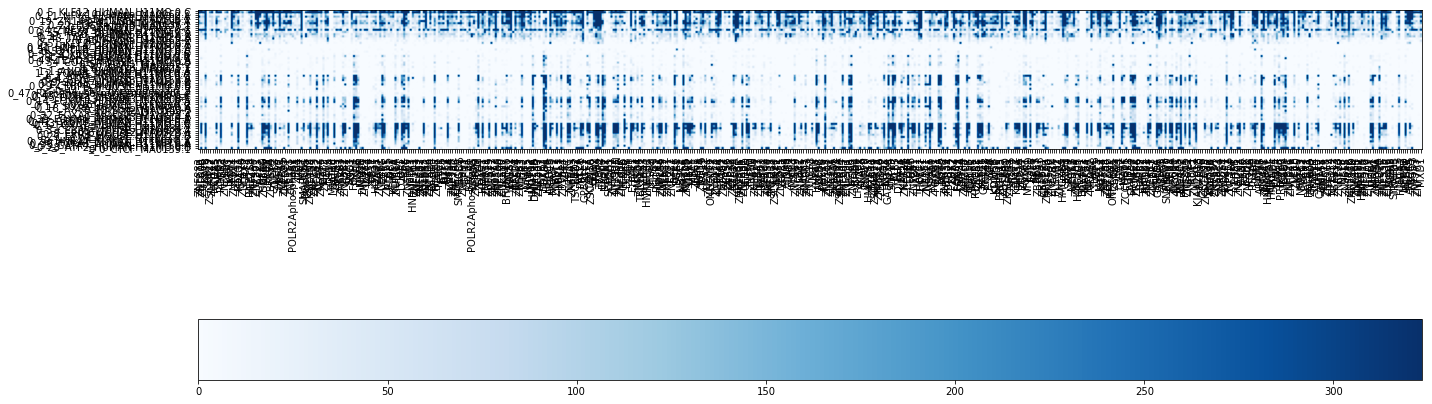

In [16]:
import sklearn.cluster
import scipy.cluster.hierarchy
import scipy.stats

def cluster_matrix_indices(matrix, num_clusters):
    """
    Clusters matrix using k-means. Always clusters on the first
    axis. Returns the indices needed to optimally order the matrix
    by clusters.
    """
    if len(matrix) == 1:
        # Don't cluster at all
        return np.array([0])

    num_clusters = min(num_clusters, len(matrix))
    
    # Perform k-means clustering
    kmeans = sklearn.cluster.KMeans(n_clusters=num_clusters)
    cluster_assignments = kmeans.fit_predict(matrix)

    # Perform hierarchical clustering on the cluster centers to determine optimal ordering
    kmeans_centers = kmeans.cluster_centers_
    cluster_order = scipy.cluster.hierarchy.leaves_list(
        scipy.cluster.hierarchy.optimal_leaf_ordering(
            scipy.cluster.hierarchy.linkage(kmeans_centers, method="centroid"), kmeans_centers
        )
    )

    # Order the peaks so that the cluster assignments follow the optimal ordering
    cluster_inds = []
    for cluster_id in cluster_order:
        cluster_inds.append(np.where(cluster_assignments == cluster_id)[0])
    cluster_inds = np.concatenate(cluster_inds)
    return cluster_inds

import matplotlib

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

import matplotlib.pyplot as plt
from matplotlib.colors import TwoSlopeNorm

# Create a figure with the right dimensions
fig, ax = plt.subplots(figsize=(20, 16))


 
inds = cluster_matrix_indices(motif_chip_pval_matrix,10)

zero_mask = motif_chip_pval_matrix == 0
min_val = np.min(motif_chip_pval_matrix[~zero_mask])
motif_chip_pval_matrix[zero_mask] = min_val
logpval_matrix = -np.log10(motif_chip_pval_matrix)
 

hmap = ax.imshow(logpval_matrix[inds], cmap="Blues")


# Set axes on heatmap
ax.set_yticks(np.arange(len(unique_motifs)))
ax.set_yticklabels(np.array(unique_motifs)[inds])
ax.set_xticks(np.arange(len(uniq_tfs)))
ax.set_xticklabels(np.array(uniq_tfs), rotation=90)

fig.colorbar(hmap, orientation="horizontal")

fig.tight_layout()
    

plt.show()

In [17]:

from statsmodels.sandbox.stats.multicomp import multipletests



0_0_CTCF_MA0139.1
['CTCF' 'RAD21' 'STAG1' 'SMC3' 'XRCC5']
0_1_FOXA1_HUMAN.H11MO.0.A
['FOXA1' 'FOXA2' 'SMARCE1' 'FOXA3' 'FOXP1']
0_2_HNF4G_MA0484.1
['HNF4A' 'HNF4G' 'KDM6A' 'SMARCE1' 'SMARCC2']
0_3_CEBPB_MOUSE.H11MO.0.A
['CEBPB' 'HLF' 'CEBPD' 'CEBPG' 'CEBPA']
0_4_ATF3_MOUSE.H11MO.0.A
['NFE2L2' 'JUND' 'NFE2' 'FOSL2' 'MAFG']
0_5_KLF12_HUMAN.H11MO.0.C
['SP5' 'SP2' 'SP1' 'CEBPZ' 'GMEB2']
0_6_TCF7L2_MA0523.1
['TCF7' 'TCF7L2' 'SMARCE1' 'SMARCC2' 'HHEX']
0_7_HNF1B_MA0153.2
['HNRNPUL1' 'HNF1A' 'SRSF9' 'ARID3A' 'KAT2B']
0_8_ERR1_MOUSE.H11MO.0.A
['NR5A1' 'SRSF9' 'NR2F1' 'RARA' 'NR2F6']
0_9_SOX9_HUMAN.H11MO.0.B
['SRSF9' 'SOX13' 'SOX5' 'TCF7' 'SOX6']
0_10_Gabpa_MA0062.2
['ZBTB40' 'GABPA' 'HCFC1' 'ELF1' 'SP2']
0_11_NFYC_HUMAN.H11MO.0.A
['IRF3' 'NFYB' 'CEBPZ' 'NFYC' 'NFYA']
0_12_NFIA_HUMAN.H11MO.0.C
['NFIA' 'NFIC' 'HMGA1' 'LCORL' 'GTF2F1']
0_13_TEAD3_MA0808.1
['TEAD4' 'TEAD1' 'ETS1' 'JUN' 'SMARCC2']
0_14_FOXM1_HUMAN.H11MO.0.A
['HMGA1' 'SMARCE1' 'FOXA2' 'FOXA1' 'HHEX']
0_15_FOXC1_forkhead_2
['FOXA1' '

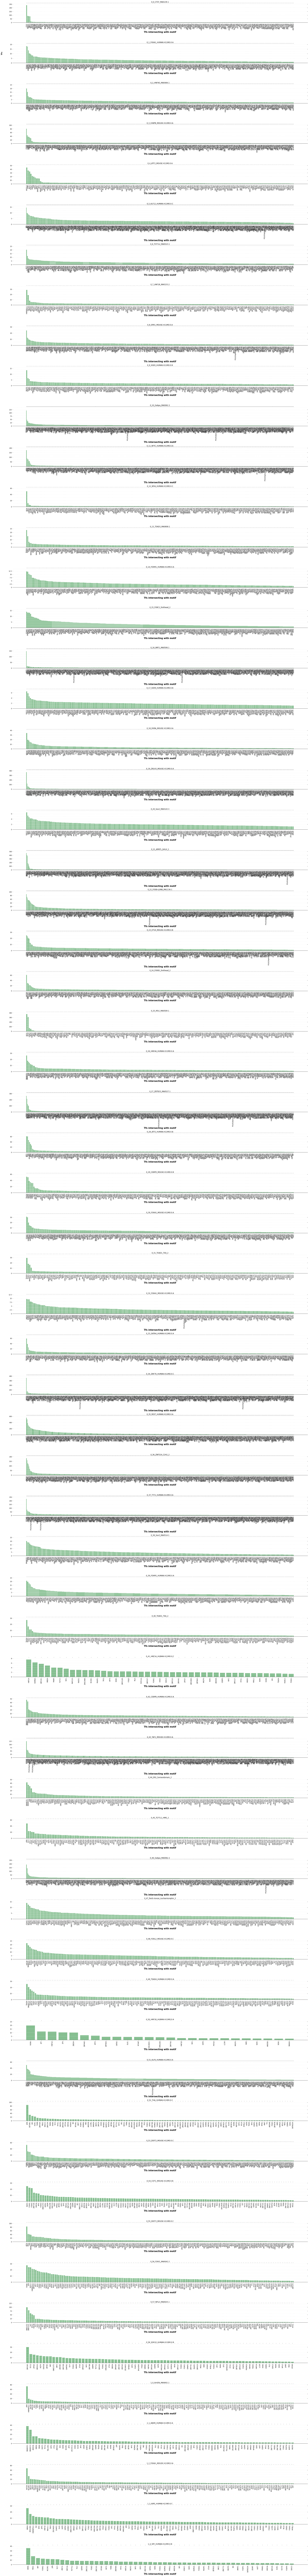

In [18]:
fig, axs = plt.subplots(len(unique_motifs),figsize=(30,250))
from matplotlib.ticker import StrMethodFormatter


for i in range(len(unique_motifs)):
    print(unique_motifs[i])
    p_adjusted = multipletests(motif_chip_pval_matrix[i,:], method='fdr_bh')
    idxs = np.argsort(odds_ratio[i,np.array(p_adjusted[0])])[::-1]
 
    ax = axs[i]
    tfs = np.array(uniq_tfs)[np.array(p_adjusted[0])][idxs]
    counts = odds_ratio[i,np.array(p_adjusted[0])][idxs]
    ax.bar(tfs, counts,color="#86bf91")
    ax.set_xticks(tfs,rotation='vertical')

    #ax.set_ylabel('odds ratio')
    #ax.set_ylabel('TFs significantly co-occuring with motif')

    ax.set_title(unique_motifs[i])

    print(np.array(uniq_tfs)[np.array(p_adjusted[0])][idxs][0:5])
    #print(odds_ratio[i,np.array(p_adjusted[0])][idxs][-5:])
    
for i,x in enumerate(axs):

    # Despine
    x.spines['right'].set_visible(False)
    x.spines['top'].set_visible(False)
    x.spines['left'].set_visible(False)

    # Switch off ticks
    x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

    # Draw horizontal axis lines
    vals = x.get_yticks()
    for tick in vals:
        x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

    # Set x-axis label
    x.set_xlabel("Tfs intersecting with motif", weight='bold', size=15)

    # Set y-axis label
    if i == 1:
        x.set_ylabel("TFs", labelpad=50, weight='bold', size=12)

    # Format y-axis label
    x.yaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))

    x.tick_params(axis='x', rotation=90)
#plt.show()
plt.tight_layout()
plt.savefig(mode+"_histplot.pdf")


In [19]:
motif_chip_pval_matrix[1,:]

array([9.99999866e-001, 4.94065646e-324, 2.51527511e-056, 4.94065646e-324,
       1.00000000e+000, 4.70688740e-001, 9.99999881e-001, 1.33460598e-001,
       4.94065646e-324, 9.99999914e-001, 4.94065646e-324, 1.00000000e+000,
       9.99999952e-001, 9.99970619e-001, 1.00000000e+000, 4.94065646e-324,
       1.00000000e+000, 9.99999905e-001, 4.94065646e-324, 9.99999860e-001,
       9.99999970e-001, 9.99999799e-001, 4.94065646e-324, 1.59859330e-166,
       2.90038196e-180, 1.26852160e-024, 9.99999744e-001, 1.00000000e+000,
       7.29039755e-073, 4.94065646e-324, 4.94065646e-324, 5.99706720e-168,
       4.94065646e-324, 7.05005881e-036, 9.99999975e-001, 4.94065646e-324,
       9.99999980e-001, 2.45956813e-081, 1.59844898e-036, 2.00131080e-061,
       9.99999798e-001, 4.94065646e-324, 9.99999804e-001, 9.99999915e-001,
       9.99999767e-001, 4.94065646e-324, 9.99999935e-001, 9.99998870e-001,
       4.94065646e-324, 9.99999920e-001, 9.81574618e-095, 4.94065646e-324,
       2.78635442e-056, 2

In [20]:
frames=[]
for i in range(len(unique_motifs)):
    print(unique_motifs[i])
    
    p_adjusted = multipletests(motif_chip_pval_matrix[i,:], method='fdr_bh')
    idxs = np.argsort(odds_ratio[i,np.array(p_adjusted[0])])[::-1]
 
    ax = axs[i]
    tfs = np.array(uniq_tfs)[np.array(p_adjusted[0])][idxs]
    counts = odds_ratio[i,np.array(p_adjusted[0])][idxs]

    new = []
    new.append(unique_motifs[i])
    new.extend(np.array(uniq_tfs)[np.array(p_adjusted[0])][idxs][0:10].tolist())
    frames.append(new)
    #ax.set_ylabel('odds ratio')
    #ax.set_ylabel('TFs significantly co-occuring with motif')

    print(np.array(uniq_tfs)[np.array(p_adjusted[0])][idxs][0:5])

outdf = pd.DataFrame(frames)
outdf.to_csv(mode+"_top10.tsv", sep='\t', header=False, index=False)

0_0_CTCF_MA0139.1
['CTCF' 'RAD21' 'STAG1' 'SMC3' 'XRCC5']
0_1_FOXA1_HUMAN.H11MO.0.A
['FOXA1' 'FOXA2' 'SMARCE1' 'FOXA3' 'FOXP1']
0_2_HNF4G_MA0484.1
['HNF4A' 'HNF4G' 'KDM6A' 'SMARCE1' 'SMARCC2']
0_3_CEBPB_MOUSE.H11MO.0.A
['CEBPB' 'HLF' 'CEBPD' 'CEBPG' 'CEBPA']
0_4_ATF3_MOUSE.H11MO.0.A
['NFE2L2' 'JUND' 'NFE2' 'FOSL2' 'MAFG']
0_5_KLF12_HUMAN.H11MO.0.C
['SP5' 'SP2' 'SP1' 'CEBPZ' 'GMEB2']
0_6_TCF7L2_MA0523.1
['TCF7' 'TCF7L2' 'SMARCE1' 'SMARCC2' 'HHEX']
0_7_HNF1B_MA0153.2
['HNRNPUL1' 'HNF1A' 'SRSF9' 'ARID3A' 'KAT2B']
0_8_ERR1_MOUSE.H11MO.0.A
['NR5A1' 'SRSF9' 'NR2F1' 'RARA' 'NR2F6']
0_9_SOX9_HUMAN.H11MO.0.B
['SRSF9' 'SOX13' 'SOX5' 'TCF7' 'SOX6']
0_10_Gabpa_MA0062.2
['ZBTB40' 'GABPA' 'HCFC1' 'ELF1' 'SP2']
0_11_NFYC_HUMAN.H11MO.0.A
['IRF3' 'NFYB' 'CEBPZ' 'NFYC' 'NFYA']
0_12_NFIA_HUMAN.H11MO.0.C
['NFIA' 'NFIC' 'HMGA1' 'LCORL' 'GTF2F1']
0_13_TEAD3_MA0808.1
['TEAD4' 'TEAD1' 'ETS1' 'JUN' 'SMARCC2']
0_14_FOXM1_HUMAN.H11MO.0.A
['HMGA1' 'SMARCE1' 'FOXA2' 'FOXA1' 'HHEX']
0_15_FOXC1_forkhead_2
['FOXA1' '

In [21]:
unique_motifs

['0_0_CTCF_MA0139.1',
 '0_1_FOXA1_HUMAN.H11MO.0.A',
 '0_2_HNF4G_MA0484.1',
 '0_3_CEBPB_MOUSE.H11MO.0.A',
 '0_4_ATF3_MOUSE.H11MO.0.A',
 '0_5_KLF12_HUMAN.H11MO.0.C',
 '0_6_TCF7L2_MA0523.1',
 '0_7_HNF1B_MA0153.2',
 '0_8_ERR1_MOUSE.H11MO.0.A',
 '0_9_SOX9_HUMAN.H11MO.0.B',
 '0_10_Gabpa_MA0062.2',
 '0_11_NFYC_HUMAN.H11MO.0.A',
 '0_12_NFIA_HUMAN.H11MO.0.C',
 '0_13_TEAD3_MA0808.1',
 '0_14_FOXM1_HUMAN.H11MO.0.A',
 '0_15_FOXC1_forkhead_2',
 '0_16_NRF1_MA0506.1',
 '0_17_SOX9_HUMAN.H11MO.0.B',
 '0_18_RXRA_MOUSE.H11MO.0.A',
 '0_19_ZN143_MOUSE.H11MO.0.A',
 '0_20_Sox2_MA0143.3',
 '0_21_ARNTL_bHLH_1',
 '0_22_FOSB+JUNB_MA1136.1',
 '0_23_ETV4_MOUSE.H11MO.0.B',
 '0_24_FOXB1_forkhead_2',
 '0_25_Rfx1_MA0509.1',
 '0_26_HNF4A_HUMAN.H11MO.0.A',
 '0_27_ZBTB33_MA0527.1',
 '0_28_ATF2_HUMAN.H11MO.0.B',
 '0_29_CEBPD_MOUSE.H11MO.0.B',
 '0_30_FOXA1_MOUSE.H11MO.0.A',
 '0_31_TEAD1_TEA_2',
 '0_32_FOXA1_MOUSE.H11MO.0.A',
 '0_33_GATA4_HUMAN.H11MO.0.A',
 '0_34_ZNF76_HUMAN.H11MO.0.C',
 '0_35_REST_HUMAN.H11MO.0.A',
 '0_36_Z

In [22]:
# data={}
# data["pval"] = motif_chip_pval_matrix
# data["odds"] = odds_ratio
# data["motif_names"] = unique_motifs
# data["tf_names"] = uniq_tfs

# import pickle as pkl
# ft = open("saving_pvals.pkl","wb")
# pkl.dump(data,ft)